In [ ]:
pip install rdflib
pip install --upgrade jinja2
pip install pywhatkit
pip install tabulate
pip install --upgrade jinja2
pip install qrcode[pil]
pip install faker
pip install selenium
pip install twilio
pip install graphviz
pip install pydot

In [5]:
from rdflib import Graph, URIRef, Literal, Namespace
from faker import Faker
import random
from tabulate import tabulate

# Create a new RDF graph
g = Graph()

# Define namespaces
FOAF = Namespace("http://xmlns.com/foaf/0.1/")
EX = Namespace("http://example.org/")

# Generate FOAF records and subsets
fake = Faker()
selected_persons = set()
friends = set()
couples = set()
haters = set()

for i in range(100):
    person_id = EX[f"person{i+1}"]
    g.add((person_id, FOAF.name, Literal(fake.name())))
    
    # Randomly choose friends for each person
    selected_persons.add(person_id)
    
# Choose subsets
remaining_persons = set(selected_persons)
for _ in range(45):
    friend = random.choice(list(remaining_persons))
    friends.add(friend)
    remaining_persons.remove(friend)

for _ in range(35):
    couple = random.choice(list(remaining_persons))
    couples.add(couple)
    remaining_persons.remove(couple)

haters = remaining_persons

# Convert sets to lists for tabulation
friends_list = list(friends)
r_list = list(couples)
haters_list = list(haters)
relatives=r_list
# Print the size of each subset
print("Number of friends:", len(friends_list))
print("Number of Relatives:", len(r_list))
print("Number of haters:", len(haters_list))

# Print tables
print("\nFriends:")
print(tabulate(enumerate(friends_list, 1), headers=["#", "User ID"]))
print("\Relatives:")
print(tabulate(enumerate(r_list, 1), headers=["#", "User ID"]))
print("\nHaters:")
print(tabulate(enumerate(haters_list, 1), headers=["#", "User ID"]))

# Save the graph to a file in RDF/XML format
g.serialize(destination='foaf_data_1000.rdf', format='xml')


Number of friends: 45
Number of Relatives: 35
Number of haters: 20

Friends:
  #  User ID
---  ---------------------------
  1  http://example.org/person79
  2  http://example.org/person52
  3  http://example.org/person14
  4  http://example.org/person3
  5  http://example.org/person2
  6  http://example.org/person19
  7  http://example.org/person67
  8  http://example.org/person9
  9  http://example.org/person1
 10  http://example.org/person6
 11  http://example.org/person41
 12  http://example.org/person12
 13  http://example.org/person88
 14  http://example.org/person40
 15  http://example.org/person32
 16  http://example.org/person35
 17  http://example.org/person97
 18  http://example.org/person53
 19  http://example.org/person72
 20  http://example.org/person58
 21  http://example.org/person8
 22  http://example.org/person85
 23  http://example.org/person65
 24  http://example.org/person55
 25  http://example.org/person29
 26  http://example.org/person7
 27  http://example.org/pe

<Graph identifier=Na72bfb7c2415482392d591a299ea2d2d (<class 'rdflib.graph.Graph'>)>

In [6]:
# Store haters in haters1 list
haters1 = [hater.split("/")[-1] for hater in haters]
relatives1 = [relative.split("/")[-1] for relative in relatives]
friends1 = [friend.split("/")[-1] for friend in friends]


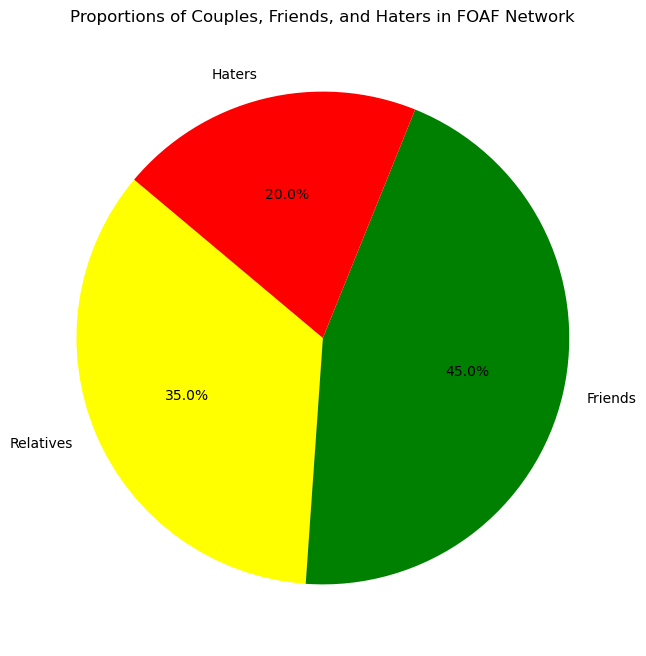

In [8]:
import matplotlib.pyplot as plt

# Calculate the number of nodes in each subset
num_relatives = len(relatives)
num_friends = len(friends)
num_haters = len(haters)

# Data for the pie chart
sizes = [num_relatives, num_friends, num_haters]
labels = ['Relatives', 'Friends', 'Haters']
colors = ['yellow', 'green', 'red']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Proportions of Couples, Friends, and Haters in FOAF Network')

# Show the plot
plt.show()


In [20]:
import random
import qrcode
from rdflib import Graph, Namespace
import webbrowser

FOAF = Namespace("http://xmlns.com/foaf/0.1/")
EX = Namespace("http://example.org/")

def is_user_present(user_id):
    g = Graph()
    g.parse("foaf_data_1000.rdf", format="xml")
    user_id_uri = EX[user_id]
    return (user_id_uri, None, None) in g

def generate_qr_code(recipient_upi_id, amount):
    # Define transaction details
    transaction_details = f"upi://pay?pa={recipient_upi_id}&pn=Recipient&am={amount}"

    # Generate QR code
    qr = qrcode.make(transaction_details)

    # Display the QR code
    qr.show()

    print("QR code displayed successfully.")
import os
def send_email(recipient_email, subject, message):
    # Compose mailto URL
    mailto_url = f"mailto:{recipient_email}?subject={subject}&body={message}"

    # Write HTML content with a clickable mailto link
    html_content = f"""<html>
<head></head>
<body>
    <a href="{mailto_url}">Click here to send email</a>
</body>
</html>"""

    # Write the HTML content to a file
    with open("email.html", "w") as f:
        f.write(html_content)

    # Open the HTML file in the default web browser
    os.system("start email.html")

    print("Email client opened.")
from twilio.rest import Client
import time
# Your Twilio account credentials
account_sid = ''
auth_token = ''

def send_sms_message(recipient_number, message_text,n):
    # Initialize Twilio Client
    client = Client(account_sid, auth_token)
    for i in range(n):
        try:
            # Send the SMS message
            
            message = client.messages.create(
                body=message_text,
                from_='',
                to='+91'+recipient_number
            )
            print("Message sent successfully!")
            time.sleep(1)
        except Exception as e:
            print(f"Error: {e}")

def main():
    # Get recipient's user ID from the user
    recipient_id = input("Enter recipient's user ID: ")
    # Check if user is present in FOAF data
    if is_user_present(recipient_id):
        # Determine recipient's category based on their ID
        if recipient_id in friends1:
            # Make money transaction
            recipient_upi_id = input("Enter recipient's UPI ID: ")
            amount = float(input("Enter the amount to transfer: "))
            generate_qr_code(recipient_upi_id, amount)
        elif recipient_id in relatives1:
            # Send Email message
            recipient_email = input("Enter recipient's email: ")
            subject = "Dear Guest"
            message = "Have you had your food?"
            send_email(recipient_email, subject, message)
        elif recipient_id in haters1:
            # Send SMS bomber
            phone_number = '+91' + input("Enter recipient's phone number: ")
            message_text = 'Hello Enemy 😂😂 have fun!'  # message content
            n=20
            send_sms_message(phone_number, message_text,n)
        else:
            print("Recipient category not defined.")
    else:
        print("No user")

if __name__ == "__main__":
    main()
    


Enter recipient's user ID:  person3
Enter recipient's UPI ID:  rohithramakrishnan865@oksbi
Enter the amount to transfer:  1


QR code displayed successfully.


In [103]:
if 'person5' in haters1:
    print(True)

True


In [9]:
from rdflib import Graph

# Load the graph from the RDF/XML file
g = Graph()
g.parse('foaf_data_1000.rdf')

# Serialize the graph to RDF/XML format
rdf_representation = g.serialize(format='xml')

# Print or use the RDF representation
print(rdf_representation)


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/person50">
    <foaf:name>Whitney Richardson</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person99">
    <foaf:name>Andrew Moore</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person44">
    <foaf:name>Jessica Bailey</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person73">
    <foaf:name>Sharon Turner</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person29">
    <foaf:name>Daniel Schultz</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person30">
    <foaf:name>Peter Nelson</foaf:name>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/person1">
    <foaf:name>Leslie Whitehead</foaf:name>
  </rdf:

In [10]:
from rdflib import Graph
import re

# Load the RDF graph
g = Graph()
g.parse('foaf_data_1000.rdf')

# Open the Pajek network file for writing
with open('foaf_network.net', 'w') as f:
    # Write the vertices (nodes) section
    f.write('*Vertices {}\n'.format(len(g)))
    node_id_map = {}  # Mapping of RDF nodes to Pajek node IDs
    for i, node in enumerate(g.subjects()):
        node_id_map[node] = i + 1
        f.write('{} "{}"\n'.format(i + 1, re.sub(r'[^\x00-\x7F]+', '', str(node))))

    # Write the edges section
    f.write('*Edges\n')
    for s, p, o in g:
        if isinstance(s, Literal) or isinstance(o, Literal):
            continue  # Skip triples with literals as subject or object
        f.write('{} {}\n'.format(node_id_map[s], node_id_map[o]))


In [11]:

import networkx as nx

# Create a new empty graph
G = nx.Graph()

# Add nodes for each friend
for friend_id in friends_list:
    G.add_node(friend_id)

# Create edges between friends (assuming undirected friendship)
for i in range(len(friends_list)):
    for j in range(i+1, len(friends_list)):
        G.add_edge(friends_list[i], friends_list[j])

# Export the graph to a Pajek format file
nx.write_pajek(G, 'friends_network.net')




In [12]:
import networkx as nx

# Create a new empty graph
G = nx.Graph()

# Add nodes for each friend
for id in haters_list:
    G.add_node(id)

# Create edges between friends (assuming undirected friendship)
for i in range(len(haters_list)):
    for j in range(i+1, len(haters_list)):
        G.add_edge(haters_list[i], haters_list[j])

# Export the graph to a Pajek format file
nx.write_pajek(G, 'haters_network.net')




In [13]:
import networkx as nx
relatives_list=r_list
# Create a new empty graph
G = nx.Graph()

# Add nodes for each friend
for id in relatives_list:
    G.add_node(id)

# Create edges between friends (assuming undirected friendship)
for i in range(len(relatives_list)):
    for j in range(i+1, len(relatives_list)):
        G.add_edge(relatives_list[i], relatives_list[j])

# Export the graph to a Pajek format file
nx.write_pajek(G, 'relatives_network.net')




In [14]:
import networkx as nx

# Step 1: Read the network from the Pajek file
G = nx.read_pajek("haters_network.net")

# Step 2: Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Step 3: Analyze closeness centrality values
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

# Optionally, you can also find the node with the highest closeness centrality
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print(f"\nNode with the highest closeness centrality: {max_closeness_node}, Closeness Centrality = {closeness_centrality[max_closeness_node]}")


Node http://example.org/person70: Closeness Centrality = 1.0
Node http://example.org/person24: Closeness Centrality = 1.0
Node http://example.org/person90: Closeness Centrality = 1.0
Node http://example.org/person45: Closeness Centrality = 1.0
Node http://example.org/person61: Closeness Centrality = 1.0
Node http://example.org/person77: Closeness Centrality = 1.0
Node http://example.org/person98: Closeness Centrality = 1.0
Node http://example.org/person62: Closeness Centrality = 1.0
Node http://example.org/person25: Closeness Centrality = 1.0
Node http://example.org/person28: Closeness Centrality = 1.0
Node http://example.org/person80: Closeness Centrality = 1.0
Node http://example.org/person47: Closeness Centrality = 1.0
Node http://example.org/person15: Closeness Centrality = 1.0
Node http://example.org/person48: Closeness Centrality = 1.0
Node http://example.org/person5: Closeness Centrality = 1.0
Node http://example.org/person99: Closeness Centrality = 1.0
Node http://example.org/p